<a href="https://colab.research.google.com/github/ReginaMoreno/TallerHC/blob/main/Clase14Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skforecast

In [2]:
!pip install sklearn

In [3]:
#Pandas
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
link="https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv"
code="?raw=true"
url=link+code
df=pd.read_csv(url,sep=",") #sep=","(separador por comas) .

In [5]:
df

,Country,Date,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
0,Guinea,29/08/2014,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
1,Nigeria,29/08/2014,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
2,Sierra Leone,29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
3,Liberia,29/08/2014,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
4,Guinea,05/09/2014,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...,...
2479,Liberia,23/03/2016,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
2480,Italy,23/03/2016,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
2481,Liberia,23/03/2016,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08
2482,Nigeria,23/03/2016,19,7.0,11.4,7.6,3.42,2.28,6.84,4.56,1.14,0.76


In [6]:
link="https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv"
code="?raw=true"
url=link+code
df=pd.read_csv(url,sep=",",index_col=1) #sep=","(separador por comas) #index_col=1.

In [7]:
df

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08


In [8]:
df.shape #datos,columnas.

(2484, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 29/08/2014 to 23/03/2016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   int64  
 2   No. of confirmed deaths  1648 non-null   float64
 3   Male Cases               2484 non-null   float64
 4   Female Cases             2484 non-null   float64
 5   Boys                     2484 non-null   float64
 6   Girls                    2484 non-null   float64
 7   Adult Male               2484 non-null   float64
 8   Adult Female             2484 non-null   float64
 9   Old Male                 2484 non-null   float64
 10  Old Female               2484 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 232.9+ KB


In [10]:
df.head()#primeros 5.

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16


In [11]:
df.tail()#últimos 5.

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08
23/03/2016,Nigeria,19,7.0,11.4,7.6,3.42,2.28,6.84,4.56,1.14,0.76
23/03/2016,United States of America,4,1.0,2.4,1.6,0.72,0.48,1.44,0.96,0.24,0.16


In [12]:
df.isnull()#cuántos datos tengo, false=vacíos true=llenos.

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
05/09/2014,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum() #espacios faltantes.

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [14]:
#Sbaer si México tiene o esta en esa base de datos.
df['Country']#Columna a la que quiero acceder.

Date
29/08/2014                      Guinea
29/08/2014                     Nigeria
29/08/2014                Sierra Leone
29/08/2014                     Liberia
05/09/2014                      Guinea
                        ...           
23/03/2016                     Liberia
23/03/2016                       Italy
23/03/2016                     Liberia
23/03/2016                     Nigeria
23/03/2016    United States of America
Name: Country, Length: 2484, dtype: object

In [15]:
df['Country'].isin(["Mexico"])

Date
29/08/2014    False
29/08/2014    False
29/08/2014    False
29/08/2014    False
05/09/2014    False
              ...  
23/03/2016    False
23/03/2016    False
23/03/2016    False
23/03/2016    False
23/03/2016    False
Name: Country, Length: 2484, dtype: bool

In [16]:
df['Country'].isin(["Mexico"]).sum()#México no está en la base de datos si la suma es 0.

0

In [17]:
cuantos=df.groupby("Country").size().reset_index(name="cuantos")
cuantos

,Country,cuantos
0,Guinea,259
1,Italy,141
2,Liberia,364
3,Mali,243
4,Nigeria,255
5,Senegal,254
6,Sierra Leone,259
7,Spain,243
8,United Kingdom,221
9,United States of America,245


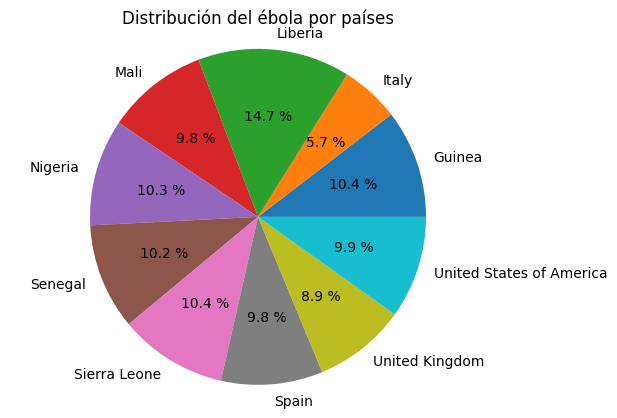

In [18]:
plt.pie(cuantos["cuantos"],labels=cuantos["Country"],autopct="%0.1f %%")
plt.axis("equal")
plt.title("Distribución del ébola por países")
plt.savefig("Pastel_Países.png",dpi=300,format="png")
plt.show()

In [19]:
df['Country']=="Sierra Leone"

Date
29/08/2014    False
29/08/2014    False
29/08/2014     True
29/08/2014    False
05/09/2014    False
              ...  
23/03/2016    False
23/03/2016    False
23/03/2016    False
23/03/2016    False
23/03/2016    False
Name: Country, Length: 2484, dtype: bool

In [20]:
SL=df[df['Country']=="Sierra Leone"]

In [21]:
SL

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56
...,...,...,...,...,...,...,...,...,...,...,...
17/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
22/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16
23/12/2015,Sierra Leone,8704,3589.0,5222.4,3481.6,1566.72,1044.48,3133.44,2088.96,522.24,348.16


In [22]:
SL=SL.drop("Country",axis=1)#drop=Borrar la columna country.

In [23]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56


In [24]:
SL[15:20]

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
22/10/2014,3223,986.0,1933.8,1289.2,580.14,386.76,1160.28,773.52,193.38,128.92
25/10/2014,3389,1008.0,2033.4,1355.6,610.02,406.68,1220.04,813.36,203.34,135.56
29/10/2014,3700,NaN,2220.0,1480.0,666.00,444.00,1332.00,888.00,222.00,148.00
31/10/2014,3778,NaN,2266.8,1511.2,680.04,453.36,1360.08,906.72,226.68,151.12
05/11/2014,4057,893.0,2434.2,1622.8,730.26,486.84,1460.52,973.68,243.42,162.28


In [25]:
SL.shape#Tamano de la base=datos,columnas.

(259, 10)

In [26]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    2
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [27]:
SL.fillna(0.0,inplace=True)#rellenar con promedio, moda, mediana o 0.0 en los datos faltantes.


In [28]:
SL.isnull().sum()#Ya no hay datos nulos.

No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [29]:
mean_values=SL["No. of confirmed deaths"].mean()
mean_values

3081.019305019305

In [30]:
SL['No. of confirmed deaths'].mean()#Promedio de muertes estimadas.

3081.019305019305

In [31]:
SL['No. of confirmed cases'].mean()#Promedio de casos confirmados.

7883.671814671815

In [32]:
Dates=SL.index[0:-1:10]
NCC=SL['No. of confirmed cases'][0:-1:10]
NCD=SL['No. of confirmed deaths'][0:-1:10]

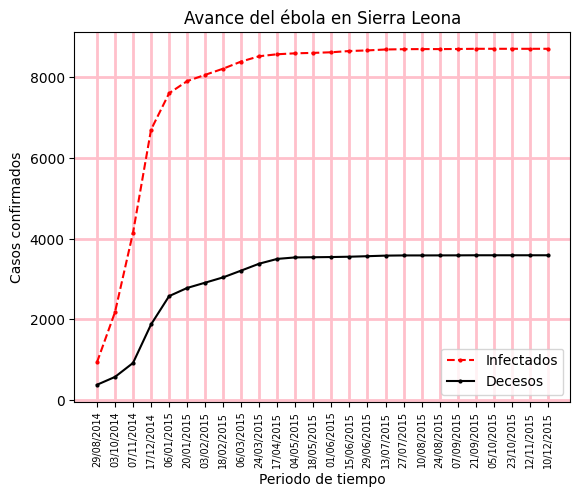

In [33]:
plt.plot(Dates,NCC,"o--r",ms=2,label="Infectados")
plt.plot(Dates,NCD,"o-k",ms=2,label="Decesos")
plt.grid(color="pink",linewidth="2",ms=20)
plt.title("Avance del ébola en Sierra Leona")
plt.ylabel("Casos confirmados")
plt.xlabel("Periodo de tiempo")
plt.xticks(rotation=90,fontsize=7)#Fechas rotadas y tamaño de las fechas.
plt.legend()
plt.show()

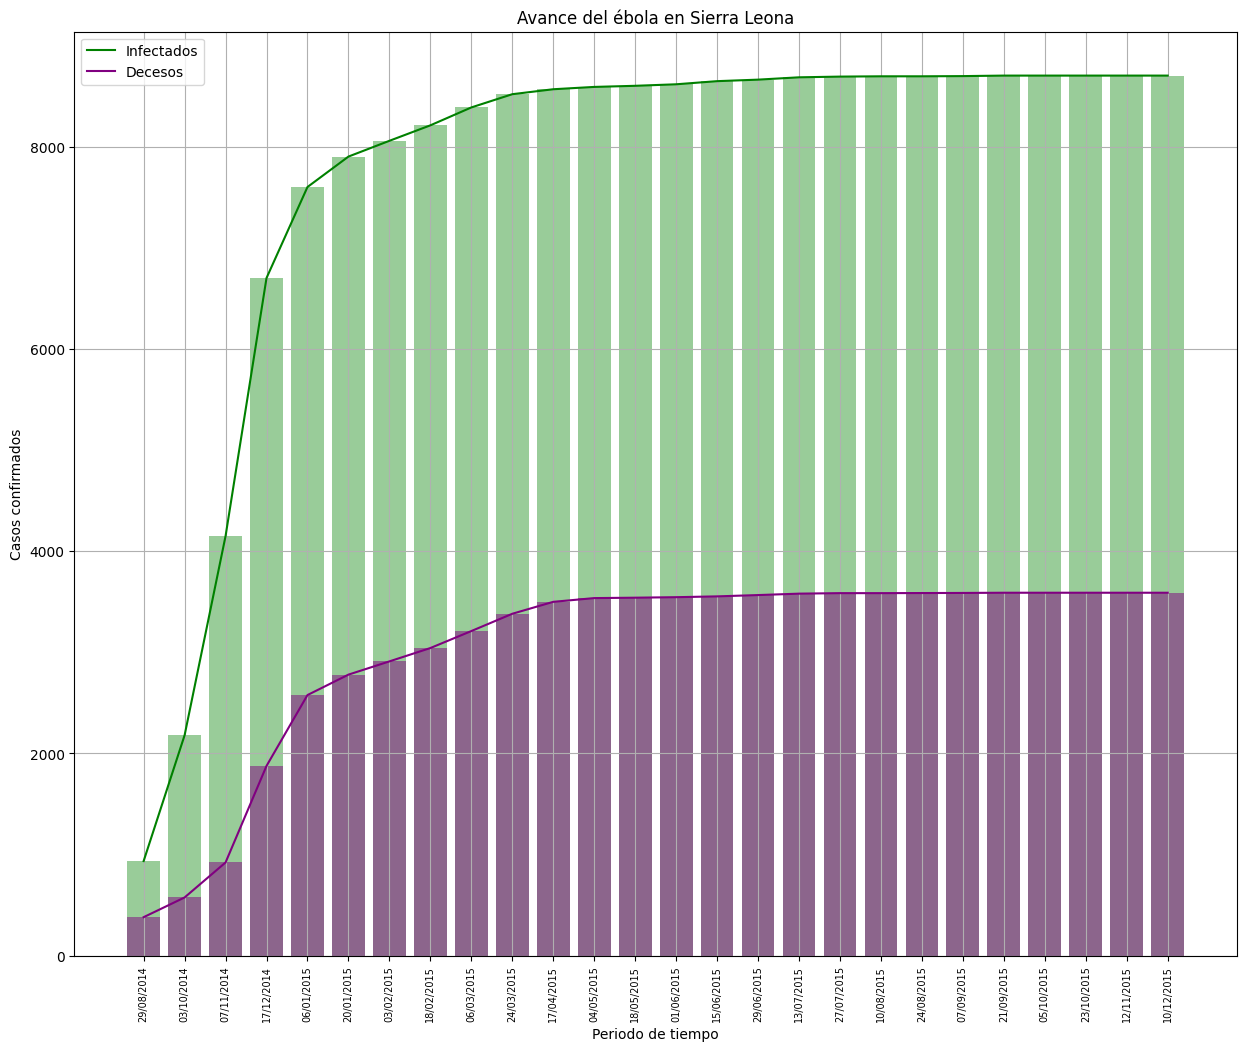

In [34]:
fig=plt.figure(figsize=(15,12))
plt.plot(Dates,NCC,color="green",ms=2,label="Infectados")
plt.bar(Dates,NCC,color="green",alpha=0.4)
plt.plot(Dates,NCD,color="purple",ms=2,label="Decesos")
plt.bar(Dates,NCD,color="purple",alpha=0.5)
plt.grid()
plt.title("Avance del ébola en Sierra Leona")
plt.ylabel("Casos confirmados")
plt.xlabel("Periodo de tiempo")
plt.xticks(rotation=90,fontsize=7)#Fechas rotadas y tamaño de las fechas.
plt.legend()
plt.savefig("GraficadeBarras.png",dpi=300,format="png")#Guardar imagen
plt.show()

In [35]:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']#Porcentaje de Infectados que terminaton en deceso
SL["PIvsD"]=PIvsD

In [36]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD
Date,,,,,,,,,,,
29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711
05/09/2014,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195
08/09/2014,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185
12/09/2014,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637
16/09/2014,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290


In [37]:
#Cantidad de los recuperados
recuperados=((100-PIvsD)/100)*SL['No. of confirmed cases']
SL["recuperados"]=recuperados

In [38]:
#Porcentaje de recuperados
SL["PR"]=(100-PIvsD)

In [39]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,PR
Date,,,,,,,,,,,,,
29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711,555.0,59.358289
05/09/2014,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195,703.0,61.343805
08/09/2014,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185,773.0,62.641815
12/09/2014,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637,809.0,62.859363
16/09/2014,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290,950.0,64.890710


In [40]:
PIvsD_mean=SL["PIvsD"].mean()
PR_mean=SL["PR"].mean()
porcentajes=[PIvsD_mean,PR_mean]
etiquetas=["PIvsD","PR"]

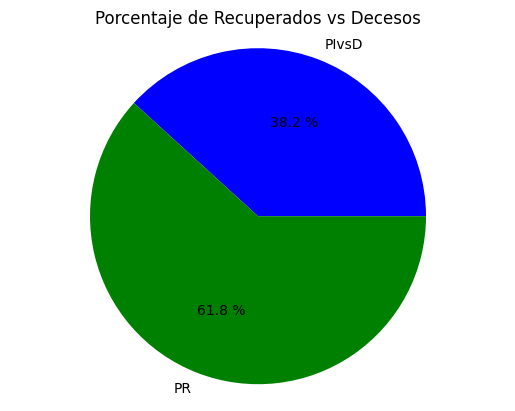

In [41]:
plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=["blue","green"])
plt.axis("equal")
plt.title("Porcentaje de Recuperados vs Decesos")
plt.show()

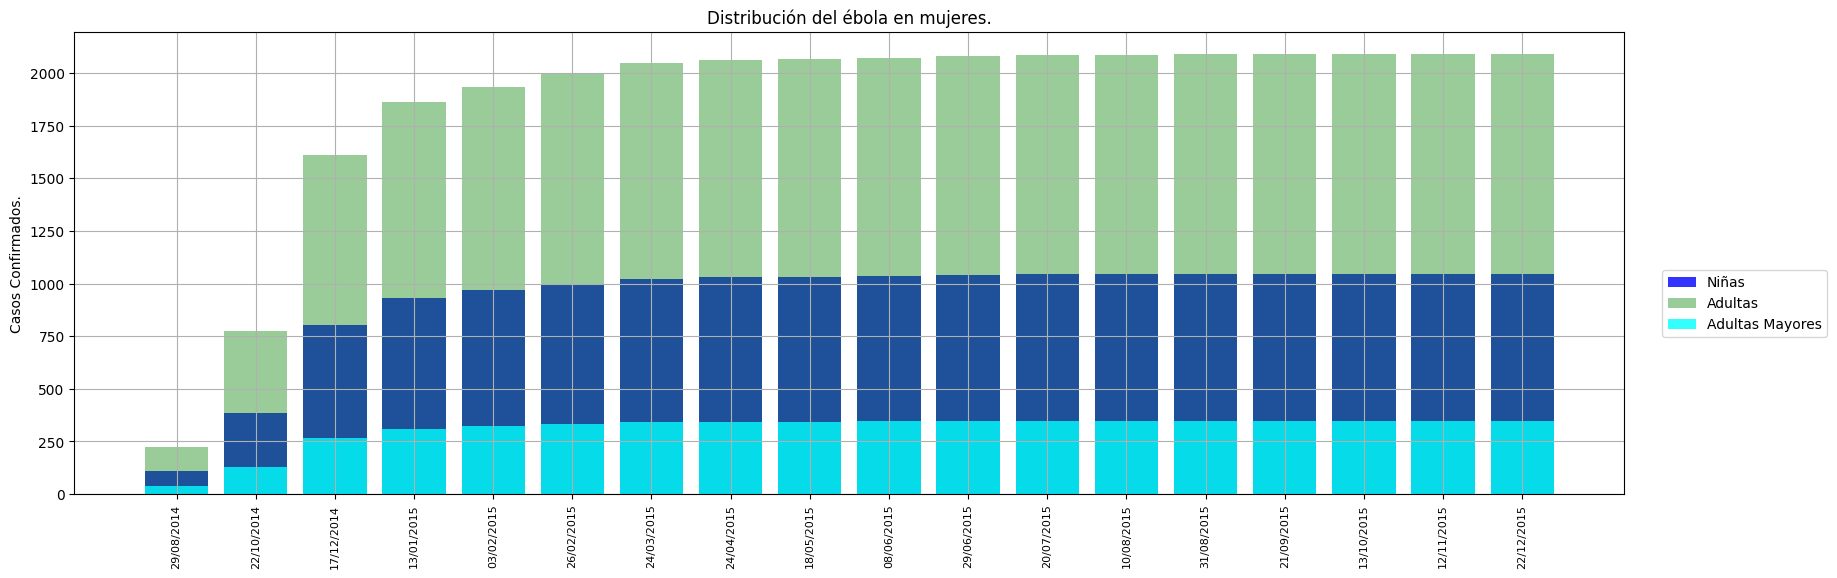

In [42]:
G=SL["Girls"][0:-1:15]
AF=SL["Adult Female"][0:-1:15]
OF=SL["Old Female"][0:-1:15]
Dates=SL.index[0:-1:15]
fig=plt.figure(figsize=(20,6))
plt.bar(Dates,G,color="blue",alpha=0.8,label="Niñas")
plt.bar(Dates,AF,color="green",alpha=0.4,label="Adultas")
plt.bar(Dates,OF,color="cyan",alpha=0.8,label="Adultas Mayores")
plt.grid()
plt.title("Distribución del ébola en mujeres.")
plt.ylabel("Casos Confirmados.")
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,0.5))
plt.savefig("Ébolaenmujeres.pdf",dpi=300,format="pdf")
plt.show()

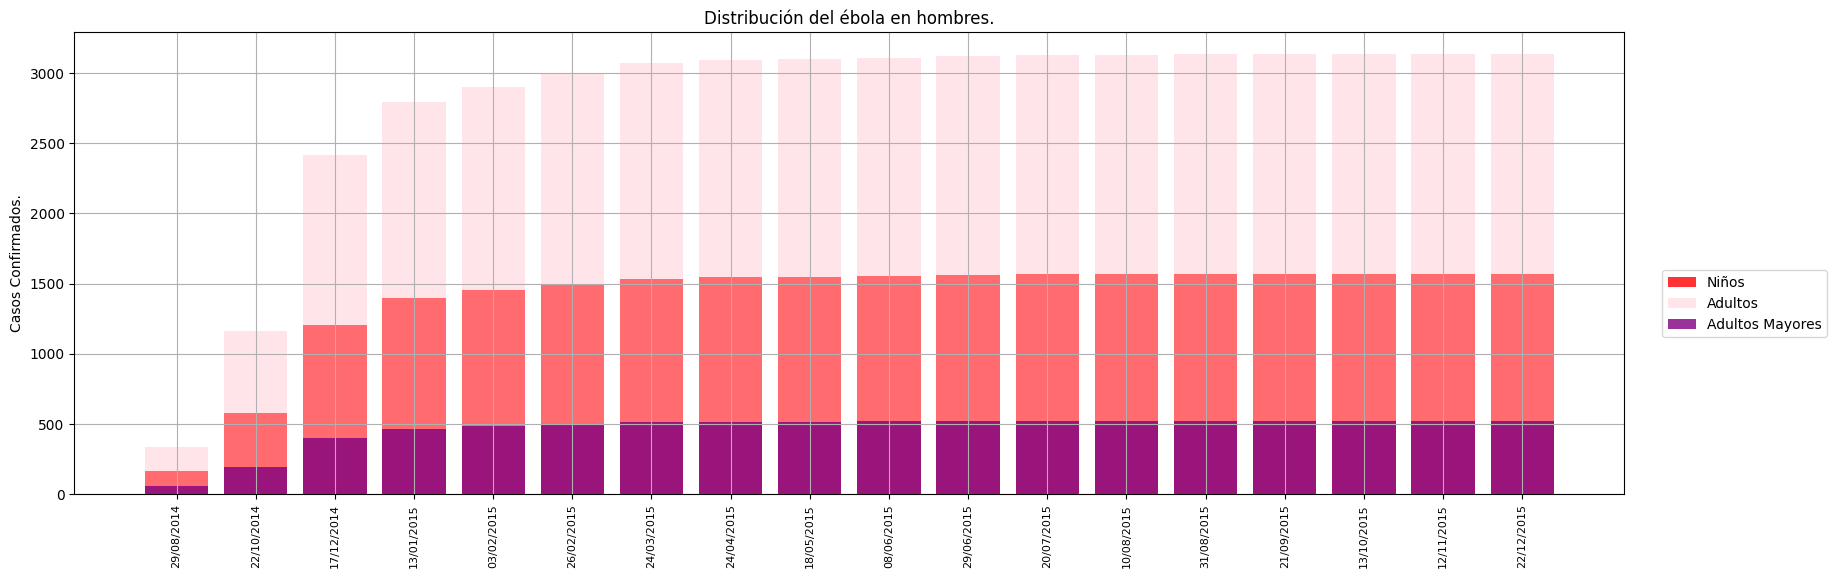

In [43]:
G=SL["Boys"][0:-1:15]
AF=SL["Adult Male"][0:-1:15]
OF=SL["Old Male"][0:-1:15]
Dates=SL.index[0:-1:15]
fig=plt.figure(figsize=(20,6))
plt.bar(Dates,G,color="red",alpha=0.8,label="Niños")
plt.bar(Dates,AF,color="pink",alpha=0.4,label="Adultos")
plt.bar(Dates,OF,color="purple",alpha=0.8,label="Adultos Mayores")
plt.grid()
plt.title("Distribución del ébola en hombres.")
plt.ylabel("Casos Confirmados.")
plt.xticks(rotation=90,fontsize=8)
plt.legend(loc="upper left",bbox_to_anchor=(1.02,0.5))
plt.savefig("Ébolaenhombres.pdf",dpi=300,format="pdf")
plt.show()

In [44]:
Boys=SL["Boys"].to_numpy()
SL_Boys=pd.DataFrame({"Boys":Boys})
SL_Boys.index=pd.to_datetime(SL.index,format="%d/%m/%Y")

In [45]:
SL_Boys

,Boys
Date,
2014-08-29,168.30
2014-09-05,206.28
2014-09-08,222.12
2014-09-12,231.66
2014-09-16,263.52
...,...
2015-12-17,1566.72
2015-12-22,1566.72
2015-12-23,1566.72


In [46]:
steps=57

data_train=SL_Boys[:-steps]
data_test=SL_Boys[:-steps]

In [47]:
print(f"Las fechas son {len(data_train)}")

Las fechas son 202


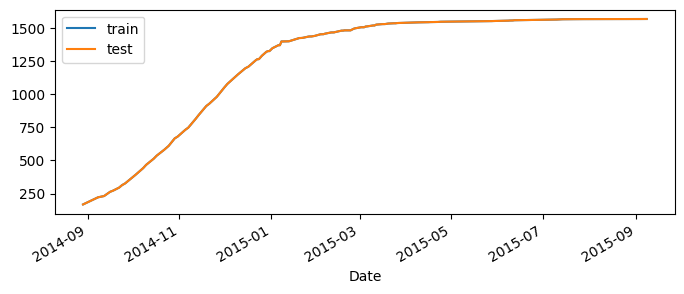

In [48]:
fig,ax=plt.subplots(figsize=(8,3))
data_train["Boys"].plot(ax=ax,label="train")
data_test["Boys"].plot(ax=ax,label="test")
ax.legend()
plt.show()

In [49]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

In [50]:
forecaster=ForecasterAutoreg(
  regressor=RandomForestRegressor(random_state=123),
  lags=6
)

In [51]:
forecaster.fit(y=data_train["Boys"])

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [52]:
steps=57
predicciones=forecaster.predict(steps=steps)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:850: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [54]:
predicciones.index=data_test.index

ValueError: ignored

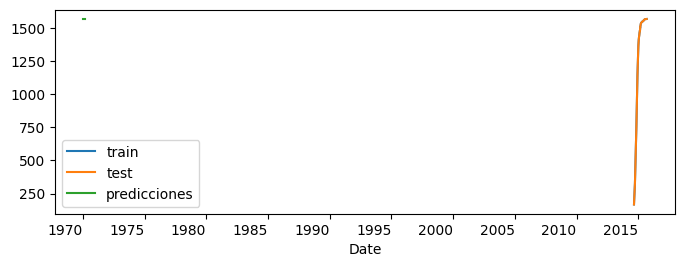

In [55]:
fig,ax=plt.subplots(figsize=(8,3))
data_train["Boys"].plot(ax=ax,label="train")
data_test["Boys"].plot(ax=ax,label="test")
predicciones.plot(ax=ax,label="predicciones")
ax.legend()
plt.show()